In [1]:
#This program performs a Stochastic Simulation Algorithm on birth-death process
# 0 -> X -> 0
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Initializations here
#nt=1000                        #indicates the number of reactions to consider
A=5                            #birth parameter
B=0.2                          #death parameter
T = 100                        #time of the end of simulation
N=100                           #number of unit intervals to consider in subsampling

x0=20                        #initial molecule count
#t_x[0]=0                       #initial time of fully-observed trajectory 
#v=np.array([1, -1])            #reaction vectors

In [3]:
#Perform the iteration - This is an implementation of the birth death process using Gillespie's algorithm    
def ssa(x0,T,A,B):
    #molecule count    x=[X]
    t_x=[0]            #reaction time
    x=[x0]
    react_type_x= []
    i=0
    v=[1,-1]
    while t_x[i]<T:
        a=np.array([A,B*x[i]])
        sum_a=np.sum(a)
        cumsum_a=np.cumsum(a,axis=0)
        epsilon=np.random.uniform(0,1,2)
        j=np.min(np.where(epsilon[0]*sum_a<cumsum_a)) 
        tau=(np.log(1/epsilon[1]))/sum_a
        x=np.append(x,[x[i]+v[j]],axis=0)
        t_x=np.append(t_x,[t_x[i]+tau])   
        react_type_x=np.append(react_type_x,[j])
        i+=1
    return x,t_x,react_type_x

x, t_x, react_type_x = ssa(x0,T,A,B)

In [4]:
#subsample the trajectory on unit intervals
y=np.zeros(N+1)
for i in range(N+1):
    idx = np.max(np.where(t_x<=i))
    y[i]=x[idx]

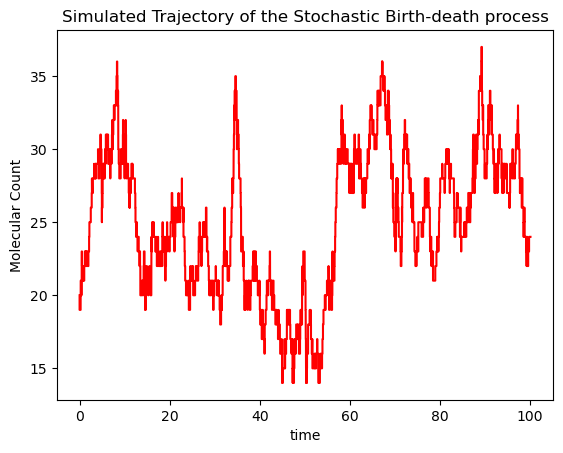

In [5]:
#plot the trajectory
plt.step(t_x,x,'-r')
plt.title('Simulated Trajectory of the Stochastic Birth-death process')
plt.xlabel('time')
plt.ylabel('Molecular Count')
plt.show()

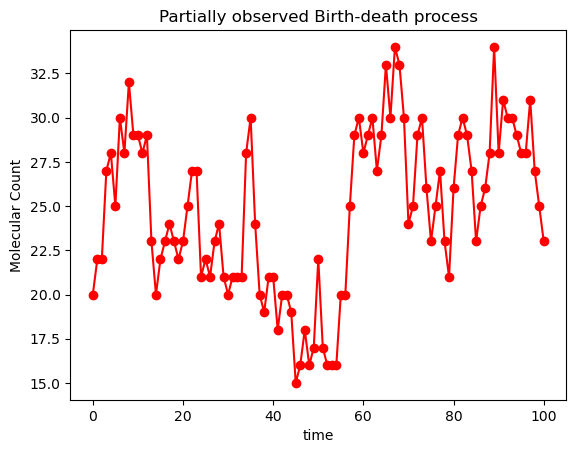

In [6]:
#Plot the subsampled trajectory
plt.scatter(np.arange(N+1),y,color='r')
plt.plot(np.arange(N+1),y,color='r')
plt.title('Partially observed Birth-death process')
plt.xlabel('time')
plt.ylabel('Molecular Count')
plt.show()

In [ ]:
#save the simulated values into .csv files
columns=' ' 
np.savetxt("full.csv", x, delimiter=",",header=columns)
np.savetxt("full_time.csv", t_x, delimiter=",",header=columns)
np.savetxt("full_type.csv", react_type_x, delimiter=",",header=columns)
#np.savetxt("subsampled.csv", y, delimiter=",",header=columns)